**HSL MODEL**

Hue, saturation, lightness

**HSV MODEL**

Hue, saturation , value

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
img = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/00-puppy.jpg")

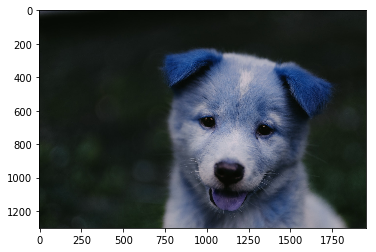

In [5]:
plt.imshow(img)

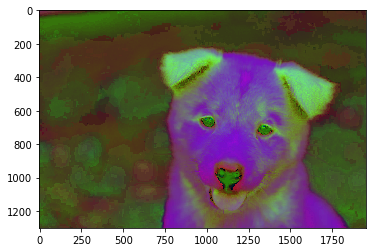

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img)

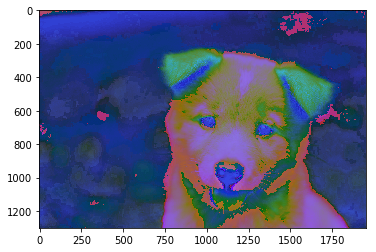

In [7]:
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
plt.imshow(img2)

**BLENDING AND PASTING IMAGES**

Blending images is done through the **addWeighted** (it works only for the images which are of same size) function that uses both images and combines them.

To blend images we use a simple formula:

**new pixel = alpha*pixel_1 + beta * pixel_2 + gamma**

So the alpha and gamma are used to see the weight of particular pixel you want from a particular image. If you want more contribution from first image then increase the value of alpha and beta for the first image.

In [27]:
img1 = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

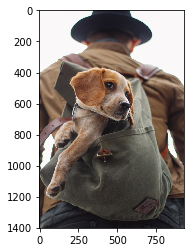

In [28]:
plt.imshow(img1)

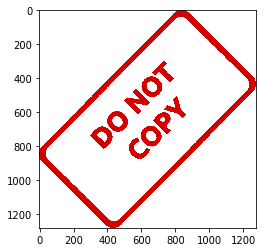

In [29]:
plt.imshow(img2)

We see that the two images do not have the same shape, so we will resize them.

In [30]:
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

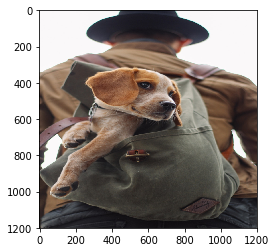

In [31]:
plt.imshow(img1)

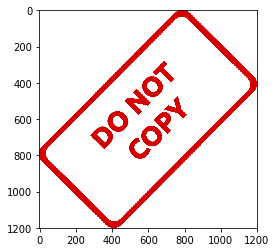

In [32]:
plt.imshow(img2)

In [33]:
blended = cv2.addWeighted(src1 = img1, alpha = 0.5, src2 = img2, beta = 0.5, gamma = 0)

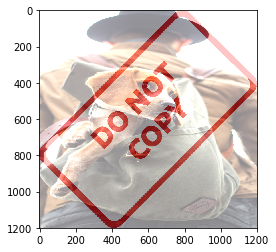

In [19]:
plt.imshow(blended)

In [46]:
blended2 = cv2.addWeighted(src1 = img1, alpha = 0.8, src2 = img2, beta = 0.3, gamma = 0)

# Gamma values does not affects much.

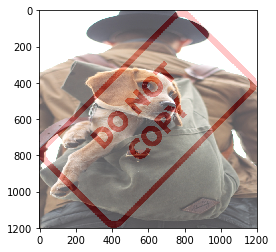

In [47]:
plt.imshow(blended2)

**OVERLAYING SMALL IMAGE ON TOP OF A LARGER IMAGE (NO BLENDING)**

Numpy Reassigmnent Operation.

In [48]:
img1 = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

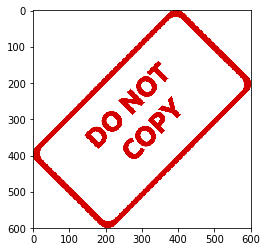

In [51]:
img2 = cv2.resize(img2, (600,600))
plt.imshow(img2);

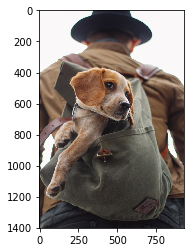

In [53]:
plt.imshow(img1)

In [59]:
large_img = img1
small_img = img2

x_offset = 0   # Starting point on the image on x axis.
y_offset = 0   # Starting point on the image on y axis.


# This is the ending point on the image.
x_end = x_offset + small_img.shape[1]   # x axis of image
y_end = y_offset + small_img.shape[0]   # y axis of image


# Assigning the values of large image to the small image. 
large_img[y_offset:y_end, x_offset:x_end] = small_img  


# It could have been written directly as :
# large_img[0:600, 0:600] = small_img

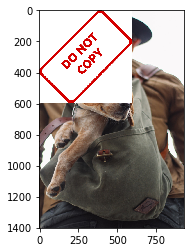

In [60]:
plt.imshow(large_img)

**BLENDING IMAGES OF DIFFERNET SIZES**

In [118]:
img1 = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [119]:
img2 = cv2.resize(img2, (600,600))

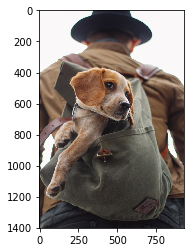

In [120]:
plt.imshow(img1);

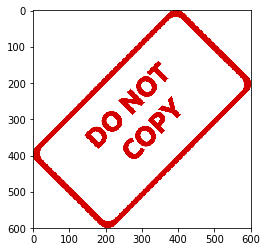

In [121]:
plt.imshow(img2);

In [122]:
img1.shape

(1401, 934, 3)

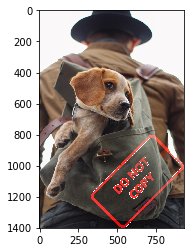

In [116]:
# The implementation of each part of code is done below.

# Location on image 1 where we want to blend the image 2.
# This is called creating a region of interest (ROI).

x_offset = 934 - 600
y_offset = 1401 - 600

rows, cols, channels = img2.shape
roi = img1[y_offset: 1401, x_offset :943]


# Now we are required to create a mask that will take only the "Do not copy" part of the 2nd image.
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# We are required to inverse the colors.
mask_inv = cv2.bitwise_not(img2gray)

white_background = np.full(img2.shape, fill_value = 255, dtype = np.uint8)
# The fill value consists of the no. by which you want the matrix to be completely filled from.

# This is done to create the mask.
bk = cv2.bitwise_or(white_background, white_background,mask = mask_inv)

# Now the color has to be red.So, the above mask created is put on the original image.
fg = cv2.bitwise_or(img2, img2, mask = mask_inv)

# The 'do not copy' separated is kept on the region of interest(ROI).
final_roi = cv2.bitwise_or(roi, fg)


# Now the complete image has to be shown, so we will put the above image on the original one.
larger_img = img1
smaller_img = final_roi
larger_img[y_offset:y_offset+smaller_img.shape[0], x_offset:x_offset+smaller_img.shape[1]] = smaller_img 

# Now the final image is displayed.
plt.imshow(larger_img)

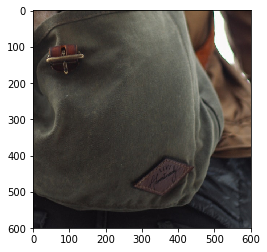

In [123]:
roi = img1[y_offset: 1401, x_offset :943]
plt.imshow(roi)

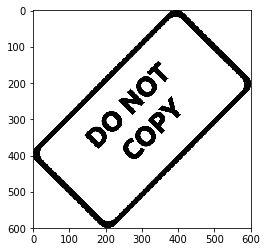

In [124]:
plt.imshow(img2gray, cmap = 'gray')

Here the colors have to be inversed i.e. we need the black portion in white and white in black.

In [125]:
mask_inv = cv2.bitwise_not(img2gray)

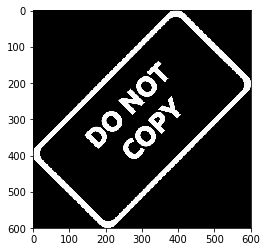

In [126]:
plt.imshow(mask_inv, cmap = 'gray');

In [127]:
mask_inv.shape

(600, 600)

There is no third channel....so we need to fix that.

In [128]:
white_background = np.full(img2.shape, fill_value = 255, dtype = np.uint8)

# The fill value consists of the no. by which you want the matrix to be completely filled from.

In [129]:
white_background.shape

(600, 600, 3)

In [130]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [131]:
# This is to create the mask.
bk = cv2.bitwise_or(white_background, white_background,mask = mask_inv)

In [132]:
bk.shape

(600, 600, 3)

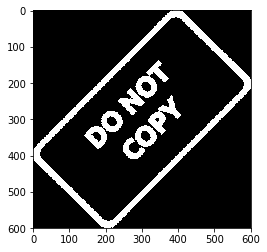

In [133]:
plt.imshow(bk);

In [134]:
# Now the color has to be red.
fg = cv2.bitwise_or(img2, img2, mask = mask_inv)

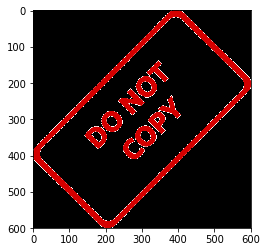

In [135]:
plt.imshow(fg)

In [136]:
final_roi = cv2.bitwise_or(roi, fg)

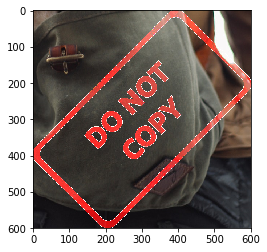

In [137]:
plt.imshow(final_roi)

In [138]:
# Now the complete image has to be shown, so we will put the above image on the original one.
larger_img = img1
smaller_img = final_roi

larger_img[y_offset:y_offset+smaller_img.shape[0], x_offset:x_offset+smaller_img.shape[1]] = smaller_img 

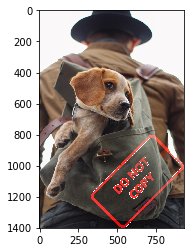

In [115]:
plt.imshow(larger_img)